## Problem Statement
#### This dataset captures sales transactions from a local restaurant. 
#### It includes details such as the order ID, date of the transaction, item names (representing various food and beverage items), item types (categorized as Fast-food or Beverages),item prices, quantities ordered, transaction amounts, transaction types (cash, online, or others), the gender of the staff member who received the order, and the time of the sale (Morning, Evening, Afternoon, Night, Midnight).The dataset offers a valuable snapshot of the restaurant's daily operations and customer behavior.
#### The project aims to answer several questions related to the given dataset, including:
#### •	The most frequently ordered item
#### •	Top 5 Items by Revenue
#### •	Determine the peak sales periods to optimize staffing and inventory management.
#### •	Determine which item type (Fastfood or Beverages) generates the most revenue and identify any trends over time
#### •	Investigate if the gender of staff handling transactions affects sales volume 


In [1]:
#importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
# importing and loading the dataset
data=pd.read_csv("Balaji_Fast_Food_Sales.csv")

In [3]:
# First 5 rows of the dataset
data.head(5)

,order_id,date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale
0,1,07-03-2022,Aalopuri,Fastfood,20,13,260,NaN,Mr.,Night
1,2,8/23/2022,Vadapav,Fastfood,20,15,300,Cash,Mr.,Afternoon
2,3,11/20/2022,Vadapav,Fastfood,20,1,20,Cash,Mr.,Afternoon
3,4,02-03-2023,Sugarcane juice,Beverages,25,6,150,Online,Mr.,Night
4,5,10-02-2022,Sugarcane juice,Beverages,25,8,200,Online,Mr.,Evening


In [4]:
# getting a brief view of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            1000 non-null   int64 
 1   date                1000 non-null   object
 2   item_name           1000 non-null   object
 3   item_type           1000 non-null   object
 4   item_price          1000 non-null   int64 
 5   quantity            1000 non-null   int64 
 6   transaction_amount  1000 non-null   int64 
 7   transaction_type    893 non-null    object
 8   received_by         1000 non-null   object
 9   time_of_sale        1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


In [5]:
# Checking the number of null values we have 
data.isnull().sum()

order_id                0
date                    0
item_name               0
item_type               0
item_price              0
quantity                0
transaction_amount      0
transaction_type      107
received_by             0
time_of_sale            0
dtype: int64

#### From the information above it is clear that the column"transaction type" has 107 null values. This will be handled by filling the null values with the mode of the "'transaction type" column

In [6]:
# filling missing values
modal_value=data["transaction_type"].mode()[0]
data["transaction_type"].fillna(modal_value,inplace=True)

In [7]:
# To get the most frequently ordered item
frequently_ordered=data.groupby("item_name").size().idxmax()

In [8]:
# To get the top 5 items by revenue
top_five=[]
top_five.append(data.groupby("item_name")["transaction_amount"].sum().sort_values(ascending=False).head())

In [9]:
data["time_of_sale"].unique()

array(['Night', 'Afternoon', 'Evening', 'Morning', 'Midnight'],
      dtype=object)

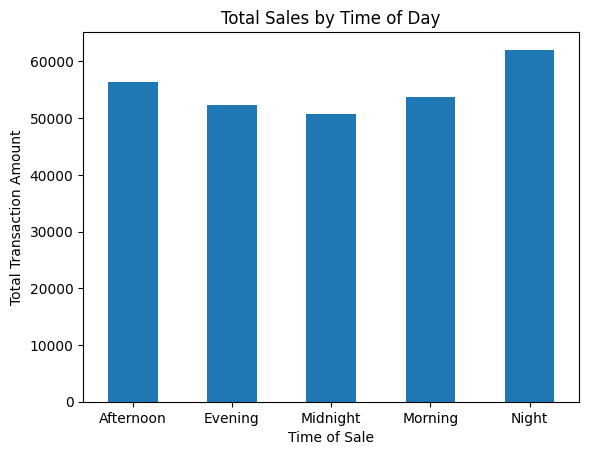

In [10]:
# Determine the peak sales periods to optimize staffing and inventory management.
data.groupby("time_of_sale")["transaction_amount"].sum().plot(kind="bar")
plt.title('Total Sales by Time of Day')
plt.xlabel('Time of Sale')
plt.ylabel('Total Transaction Amount')
plt.xticks(rotation=0)
plt.show()

#### From the figure above,the Period when more sales are made occurs at Night 

In [11]:
# To get which item type generates the most revenue
data.groupby("item_type")["transaction_amount"].sum()

item_type
Beverages     86390
Fastfood     188840
Name: transaction_amount, dtype: int64

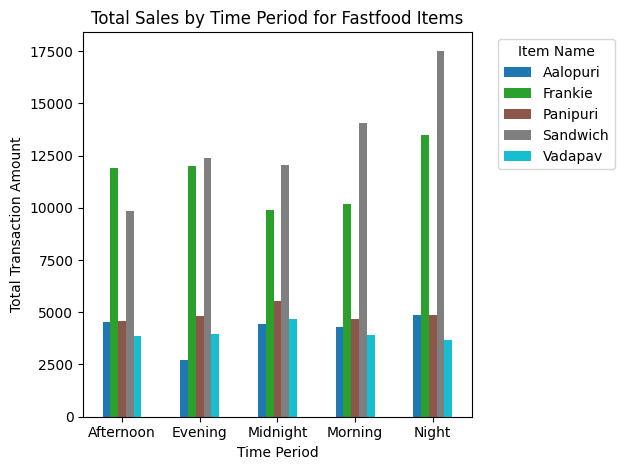

In [12]:
# Identifying trends over Fastfoods
fastfood_data =data[data["item_type"]=="Fastfood"]
grouped_data = fastfood_data.groupby(['time_of_sale', 'item_name'])['transaction_amount'].sum().unstack().fillna(0)
item_colors = plt.cm.get_cmap('tab10', len(grouped_data.columns))
figure = grouped_data.plot(kind='bar', stacked=False, color=[item_colors(i) for i in range(len(grouped_data.columns))])
plt.title('Total Sales by Time Period for Fastfood Items')
plt.xlabel('Time Period')
plt.ylabel('Total Transaction Amount')
plt.xticks(rotation=0)
plt.legend(title='Item Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#### To find out if there is a relationshp between gender and the sales volume, we will be using a test of correlation co-efficient

In [13]:
# Converting gender(received_by) to numeric values
data["received_by"]=data["received_by"].map({"Mr.":0,"Mrs.":1})

In [14]:
# Computing correlation coefficient
correlation = data['received_by'].corr(data['transaction_amount'])

In [15]:
print(f"Correlation coefficient: {correlation}")

Correlation coefficient: -0.024698555433101288


#### From the above we can see a correlation coefficient of -0.025, which indicates a very weak and practically insignificant negative linear relationship between gender and sales volume .

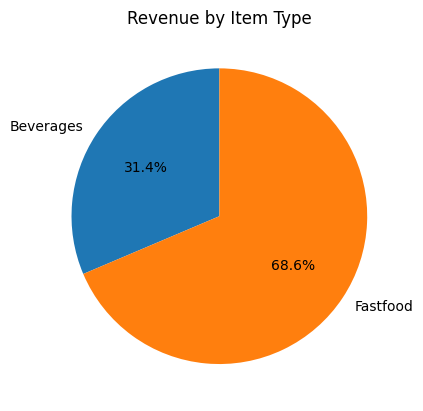

In [16]:
# A pie chart to show the percentage Revenue brought in by Beverages and Fastfood
revenue_by_item_type = data.groupby("item_type")["transaction_amount"].sum()
revenue_by_item_type.plot(kind="pie", autopct='%1.1f%%', startangle=90)
plt.title('Revenue by Item Type')
plt.ylabel('')
plt.show()


In [17]:
# To answer the Questions
print("The most frequently ordered item is :",frequently_ordered)
print("The top 5 items by Revenue are :",top_five)
print("The Peak Sale period occurs a Night")
print("Fastfood generates more revenue compared to Beverages")
print("There is no significant relationship between gender and sales volume")

The most frequently ordered item is : Cold coffee
The top 5 items by Revenue are : [item_name
Sandwich           65820
Frankie            57500
Cold coffee        54440
Sugarcane juice    31950
Panipuri           24520
Name: transaction_amount, dtype: int64]
The Peak Sale period occurs a Night
Fastfood generates more revenue compared to Beverages
There is no significant relationship between gender and sales volume


##### 

#### Author:Tanimowo Possible
#### Linked In: https://www.linkedin.com/in/tanimowo-possible-18996a270/
#### Github:https://github.com/positanny13